In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
py.offline

<module 'plotly.offline' from 'D:\\Download\\Anaconda\\lib\\site-packages\\plotly\\offline\\__init__.py'>

In [2]:
salary_data=pd.read_csv('data.csv')
house_data=pd.read_csv('housing.csv')

In [265]:
salary_data.shape, # 30,2 
salary_data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [4]:
print(house_data.shape)
house_data.head()


(21613, 21)


id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# EDA of SALARY_DATA

Missing values, Duplicated values, Data types, Data distribution, Outliers, Correlations, Feature importance, Dimensionality reduction ,Data visualization

### Data types - Check if the data types of each column are appropriate for the type of analysis you will be doing.

In [5]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Missing values -  Check if there are any missing values in your data and decide how to handle them.

In [6]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

###  Data distribution - Check if the data is normally distributed or skewed, which can affect the choice of algorithms and feature engineering techniques.

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

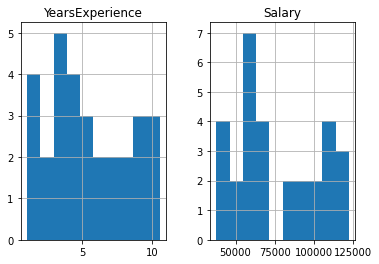

In [7]:
salary_data.hist()

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

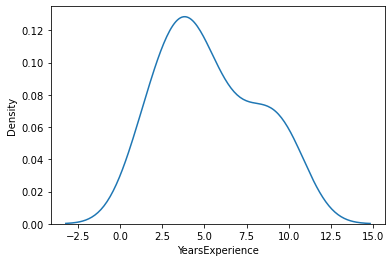

In [8]:
import seaborn as sns

# Create the density plot
sns.kdeplot(data=salary_data, x="YearsExperience")

In [9]:
salary_data.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [10]:
salary_data.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [11]:
salary_data.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [12]:
salary_data.mode()

YearsExperience    Salary
0               3.2   37731.0
1               4.0   39343.0
2               NaN   39891.0
3               NaN   43525.0
4               NaN   46205.0
5               NaN   54445.0
6               NaN   55794.0
7               NaN   56642.0
8               NaN   56957.0
9               NaN   57081.0
10              NaN   57189.0
11              NaN   60150.0
12              NaN   61111.0
13              NaN   63218.0
14              NaN   64445.0
15              NaN   66029.0
16              NaN   67938.0
17              NaN   81363.0
18              NaN   83088.0
19              NaN   91738.0
20              NaN   93940.0
21              NaN   98273.0
22              NaN  101302.0
23              NaN  105582.0
24              NaN  109431.0
25              NaN  112635.0
26              NaN  113812.0
27              NaN  116969.0
28              NaN  121872.0
29              NaN  122391.0

In [13]:
salary_data.value_counts(sort='ascending')

YearsExperience  Salary  
1.1              39343.0     1
1.3              46205.0     1
10.3             122391.0    1
9.6              112635.0    1
9.5              116969.0    1
9.0              105582.0    1
8.7              109431.0    1
8.2              113812.0    1
7.9              101302.0    1
7.1              98273.0     1
6.8              91738.0     1
6.0              93940.0     1
5.9              81363.0     1
5.3              83088.0     1
5.1              66029.0     1
4.9              67938.0     1
4.5              61111.0     1
4.1              57081.0     1
4.0              56957.0     1
                 55794.0     1
3.9              63218.0     1
3.7              57189.0     1
3.2              64445.0     1
                 54445.0     1
3.0              60150.0     1
2.9              56642.0     1
2.2              39891.0     1
2.0              43525.0     1
1.5              37731.0     1
10.5             121872.0    1
dtype: int64

<AxesSubplot:>

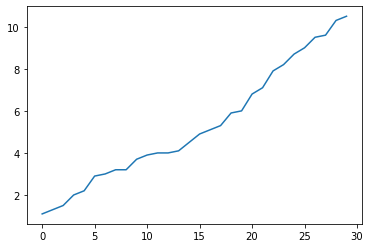

In [14]:
salary_data['YearsExperience'].plot()

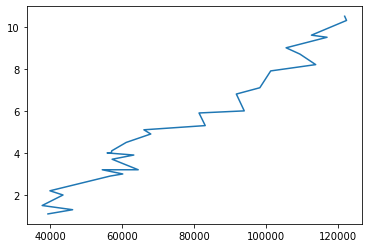

In [15]:
plt.plot(salary_data['Salary'],salary_data['YearsExperience'])

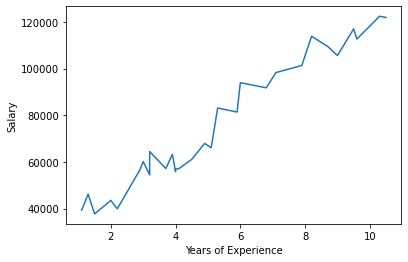

In [16]:
plt.plot(salary_data['YearsExperience'], salary_data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

<BarContainer object of 30 artists>

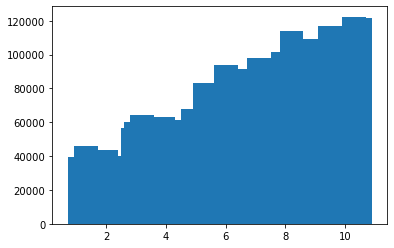

In [17]:
plt.bar(salary_data['YearsExperience'], salary_data['Salary'])

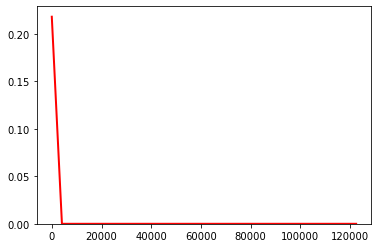

In [18]:
# Define the parameters of the normal distribution
define_mean, define_std = 0, 1 # mean and standard deviation

# # Generate a set of random numbers that follow a normal distribution
# s = np.random.normal(mu, sigma, 1000)

# Plot the histogram of the data
count, bins, ignored = plt.hist(salary_data, 30, density=True)

# Plot the probability density function of the normal distribution
plt.plot(bins, 1/(define_std * np.sqrt(2 * np.pi)) * np.exp( - (bins - define_mean)**2 / (2 * define_std**2) ), linewidth=2, color='r')

# Show the plot
plt.show()


(array([[2.45118265e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.45118265e-05, 8.17060885e-06, 8.17060885e-06,
        0.00000000e+00, 4.08530442e-05, 2.45118265e-05, 1.63412177e-05,
        1.63412177e-05, 0.00000000e+00, 0.00000000e+00, 8.17060885e-06,
        8.17060885e-06, 0.00000000e+00, 8.17060885e-06, 8.17060885e-06,
        1.63412177e-05

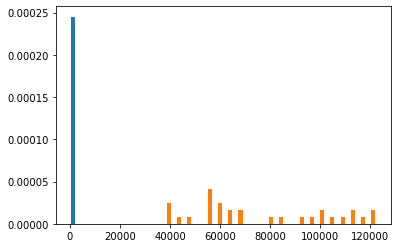

In [19]:
print(plt.hist(salary_data, 30, density=True))

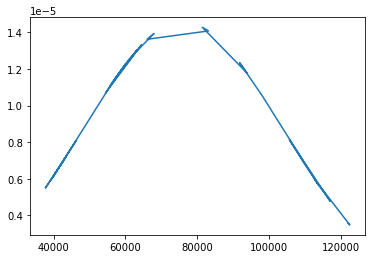

In [20]:
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
# x_axis = np.arange(-20, 20, 0.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(salary_data['Salary'])
sd = statistics.stdev(salary_data['Salary'])
  
plt.plot(salary_data['Salary'], norm.pdf(salary_data['Salary'], mean, sd))
plt.show()

In [21]:
# Conclusion - right skewed

In [22]:
mean,sd

(76003.0, 27414.4297845823)

### Outliers - : Identify any outliers in the data and decide how to handle them.

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc9afe19a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc9afe1bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc9afe10d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc9afa3f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc9afa3be0>],
 'means': []}

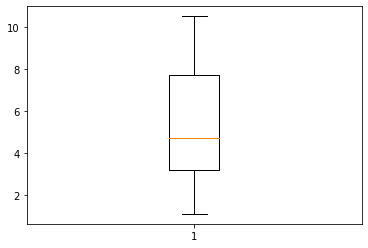

In [23]:
plt.boxplot(salary_data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc9ad10070>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc9ad10f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc9ad9bc40>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc9ad10c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc9a6418e0>],
 'means': []}

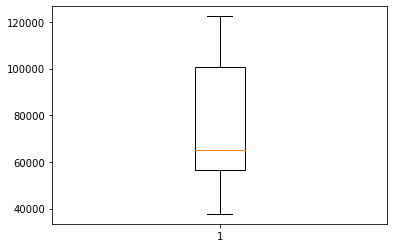

In [24]:
plt.boxplot(salary_data['Salary'])

In [25]:
from scipy import stats

zs = stats.zscore(salary_data['Salary'])
for each in zs:
    if each>3 or each<-3:
        print(each)

In [26]:
from scipy import stats

zs = stats.zscore(salary_data['YearsExperience'])
for each in zs:
    if each>3 or each<-3:
        print(each)

In [27]:
iqr1 = np.percentile(salary_data['Salary'],25)
iqr2= np.percentile(salary_data['Salary'],50)
iqr3 = np.percentile(salary_data['Salary'],75)

iqr1,iqr2,iqr3

iqr = iqr3-iqr1
iqr

43824.0

### Correlations: Look for correlations between the target variable and other features in the data, as well as correlations among the features themselves.

In [28]:
salary_data.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

### Feature importance: Determine which features are most important for predicting the target variable.

### Dimensionality reduction: Consider whether some features can be combined or eliminated to reduce the dimensionality of the problem.



### Data visualization: Use various types of visualizations to gain insights into the data and identify patterns.

In [29]:
salary_data.duplicated().sum()

0

In [30]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [31]:
salary_data.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [32]:
salary_data.shape

(30, 2)

In [33]:
salary_data.value_counts()

YearsExperience  Salary  
1.1              39343.0     1
1.3              46205.0     1
10.3             122391.0    1
9.6              112635.0    1
9.5              116969.0    1
9.0              105582.0    1
8.7              109431.0    1
8.2              113812.0    1
7.9              101302.0    1
7.1              98273.0     1
6.8              91738.0     1
6.0              93940.0     1
5.9              81363.0     1
5.3              83088.0     1
5.1              66029.0     1
4.9              67938.0     1
4.5              61111.0     1
4.1              57081.0     1
4.0              56957.0     1
                 55794.0     1
3.9              63218.0     1
3.7              57189.0     1
3.2              64445.0     1
                 54445.0     1
3.0              60150.0     1
2.9              56642.0     1
2.2              39891.0     1
2.0              43525.0     1
1.5              37731.0     1
10.5             121872.0    1
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='count'>

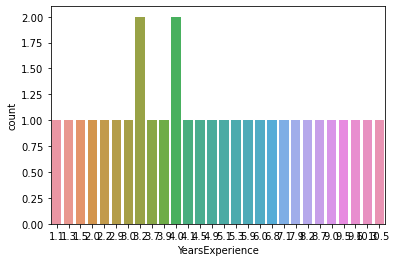

In [34]:
sns.countplot(salary_data['YearsExperience'])

In [35]:
import plotly as py

In [36]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
py.offline

<module 'plotly.offline' from 'D:\\Download\\Anaconda\\lib\\site-packages\\plotly\\offline\\__init__.py'>

In [37]:
px.bar(salary_data['YearsExperience'])

In [38]:
px.violin(data_frame=salary_data, x='Salary',y='YearsExperience',color='Salary')

In [39]:
px.histogram(data_frame=salary_data,x='Salary')

In [40]:
salary_data.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

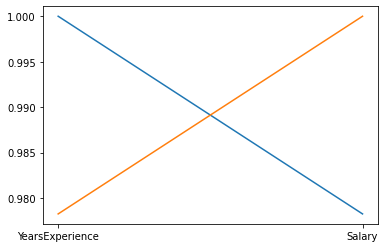

In [41]:
plt.plot(salary_data.corr())

<AxesSubplot:>

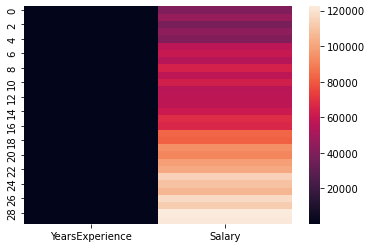

In [42]:
sns.heatmap(salary_data)

# EDA of House Data
Missing values, Duplicated values, Data types, Data distribution, Outliers, Correlations, Feature importance, Dimensionality reduction ,Data visualization

In [43]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [44]:
house_data.duplicated().sum()

0

In [45]:
house_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [46]:
house_data.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [47]:
house_data.shape

(21613, 21)

In [48]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [49]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [50]:
house_data['date'] = pd.to_datetime(house_data['date'])

In [51]:
house_data.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

In [52]:
house_data.rename(columns={'sqft_living15':'sqft_basement_15'},inplace=True)

In [53]:
fig = px.histogram(data_frame=house_data,x='price',y='sqft_living',color='price')
fig.show()

<AxesSubplot:>

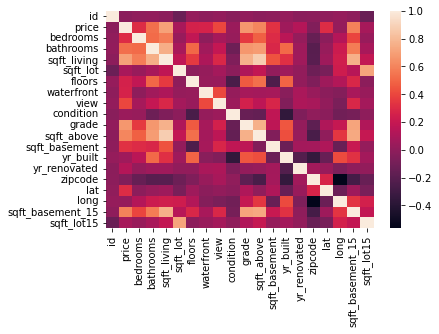

In [54]:
sns.heatmap(house_data.corr())

In [55]:
# box method for outliers

px.box(house_data['price'])

In [56]:
# iqr method for outliers

iqr1=np.percentile(house_data.price,25)
iqr2=np.percentile(house_data.price,50)
iqr3=np.percentile(house_data.price,75)
IQR=iqr3-iqr1
IQR

323050.0

In [57]:
upper_limit=iqr3+(1.5*IQR)
lower_limit=iqr1-(1.5*IQR)
upper_limit,lower_limit # 1225000

(1129575.0, -162625.0)

In [58]:
house_data[house_data.price>upper_limit]

id       date    price  bedrooms  bathrooms  sqft_living  \
5      7237550310 2014-05-12  1225000         4       4.50         5420   
21     2524049179 2014-08-26  2000000         3       2.75         3050   
49      822039084 2015-03-11  1350000         3       2.50         2753   
69     1802000060 2014-06-12  1325000         5       2.25         3200   
125    4389200955 2015-03-02  1450000         4       2.75         2750   
...           ...        ...      ...       ...        ...          ...   
21568   524059330 2015-01-30  1700000         4       3.50         3830   
21576  9253900271 2015-01-07  3567000         5       4.50         4850   
21590  7430200100 2014-05-14  1222500         4       3.50         4910   
21597   191100405 2015-04-21  1575000         4       3.25         3410   
21600   249000205 2014-10-15  1537000         5       3.75         4470   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
5        101930     1.0           0     0  ...     11        3890   
21        44867     1.0           0     4  ...      9        2330   
49        65005     1.0           1     2  ...      9        2165   
69        20158     1.0           0     0  ...      8        1600   
125       17789     1.5           0     0  ...      8        1980   
...         ...     ...         ...   ...  ...    ...         ...   
21568      8963     2.0           0     0  ...     10        3120   
21576     10584     2.0           1     4  ...     10        3540   
21590      9444     1.5           0     0  ...     11        3110   
21597     10125     2.0           0     0  ...     10        3410   
21600      8088     2.0           0     0  ...     11        4470   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
5               1530      2001             0    98053  47.6561 -122.005   
21               720      1968             0    98040  47.5316 -122.233   
49               588      1953             0    98070  47.4041 -122.451   
69              1600      1965             0    98004  47.6303 -122.215   
125              770      1914          1992    98004  47.6141 -122.212   
...              ...       ...           ...      ...      ...      ...   
21568            710      2014             0    98004  47.5990 -122.197   
21576           1310      2007             0    98008  47.5943 -122.110   
21590           1800      2007             0    98074  47.6502 -122.066   
21597              0      2007             0    98040  47.5653 -122.223   
21600              0      2008             0    98004  47.6321 -122.200   

       sqft_basement_15  sqft_lot15  
5                  4760      101930  
21                 4110       20336  
49                 2680       72513  
69                 3390       20158  
125                3060       11275  
...                 ...         ...  
21568              2190       10777  
21576              3470       18270  
21590              4560       11063  
21597              2290       10125  
21600              2780        8964  

[1146 rows x 21 columns]

In [59]:
print(np.where(house_data.price>upper_limit))

(array([    5,    21,    49, ..., 21590, 21597, 21600], dtype=int64),)


In [60]:
upper_index_array = np.where(house_data.price>upper_limit)
upper_index_array[1:]

()

In [61]:
px.scatter(house_data.price)

In [62]:
upper_index_array = np.where(house_data.price>upper_limit)

for each in upper_index_array:
    house_data.price[each] = upper_limit

In [63]:
house_data[house_data.price>upper_limit]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_basement_15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [64]:
house_data[house_data.price<lower_limit]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_basement_15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [65]:
house_data.nunique(), house_data.shape

(id                  21436
 date                  372
 price                3545
 bedrooms               13
 bathrooms              30
 sqft_living          1038
 sqft_lot             9782
 floors                  6
 waterfront              2
 view                    5
 condition               5
 grade                  12
 sqft_above            946
 sqft_basement         306
 yr_built              116
 yr_renovated           70
 zipcode                70
 lat                  5034
 long                  752
 sqft_basement_15      777
 sqft_lot15           8689
 dtype: int64,
 (21613, 21))

In [66]:
house_data['date'][3].year - house_data.yr_built[1]

63

In [78]:
# def calculate_age_of_house(data):
#     print(data[1][1],data[1][14])
# li=list()
# for index in range(house_data.shape[0]):
#     age=li.append(house_data['date'][index].year - house_data.yr_built[index])


age_of_house = [house_data['date'][index].year - house_data['yr_built'][index] for index in range(house_data.shape[0])]

house_data['age_of_house']=age_of_house

In [79]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21613 non-null  int64         
 1   date              21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   bedrooms          21613 non-null  int64         
 4   bathrooms         21613 non-null  float64       
 5   sqft_living       21613 non-null  int64         
 6   sqft_lot          21613 non-null  int64         
 7   floors            21613 non-null  float64       
 8   waterfront        21613 non-null  int64         
 9   view              21613 non-null  int64         
 10  condition         21613 non-null  int64         
 11  grade             21613 non-null  int64         
 12  sqft_above        21613 non-null  int64         
 13  sqft_basement     21613 non-null  int64         
 14  yr_built          2161

In [80]:
house_data.head()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3       1.00         1180      5650   
1  6414100192 2014-12-09  538000         3       2.25         2570      7242   
2  5631500400 2015-02-25  180000         2       1.00          770     10000   
3  2487200875 2014-12-09  604000         4       3.00         1960      5000   
4  1954400510 2015-02-18  510000         3       2.00         1680      8080   

   floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...        1180              0      1955   
1     2.0           0     0  ...        2170            400      1951   
2     1.0           0     0  ...         770              0      1933   
3     1.0           0     0  ...        1050            910      1965   
4     1.0           0     0  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_basement_15  sqft_lot15  \
0             0    98178  47.5112 -122.257              1340        5650   
1          1991    98125  47.7210 -122.319              1690        7639   
2             0    98028  47.7379 -122.233              2720        8062   
3             0    98136  47.5208 -122.393              1360        5000   
4             0    98074  47.6168 -122.045              1800        7503   

   age_of_house  
0            59  
1            63  
2            82  
3            49  
4            28  

[5 rows x 22 columns]

In [81]:
house_data.agg({'min','max','mean','median'})

id                          date         price   bedrooms  \
max     9.900000e+09 2015-05-27 00:00:00.000000000  1.129575e+06  33.000000   
mean    4.580302e+09 2014-10-29 04:38:01.959931648  5.115873e+05   3.370842   
median  3.904930e+09 2014-10-16 00:00:00.000000000  4.500000e+05   3.000000   
min     1.000102e+06 2014-05-02 00:00:00.000000000  7.500000e+04   0.000000   

        bathrooms   sqft_living      sqft_lot    floors  waterfront      view  \
max      8.000000  13540.000000  1.651359e+06  3.500000    1.000000  4.000000   
mean     2.114757   2079.899736  1.510697e+04  1.494309    0.007542  0.234303   
median   2.250000   1910.000000  7.618000e+03  1.500000    0.000000  0.000000   
min      0.000000    290.000000  5.200000e+02  1.000000    0.000000  0.000000   

        ...   sqft_above  sqft_basement     yr_built  yr_renovated  \
max     ...  9410.000000    4820.000000  2015.000000   2015.000000   
mean    ...  1788.390691     291.509045  1971.005136     84.402258   
median  ...  1560.000000       0.000000  1975.000000      0.000000   
min     ...   290.000000       0.000000  1900.000000      0.000000   

             zipcode        lat        long  sqft_basement_15     sqft_lot15  \
max     98199.000000  47.777600 -121.315000       6210.000000  871200.000000   
mean    98077.939805  47.560053 -122.213896       1986.552492   12768.455652   
median  98065.000000  47.571800 -122.230000       1840.000000    7620.000000   
min     98001.000000  47.155900 -122.519000        399.000000     651.000000   

        age_of_house  
max       115.000000  
mean       43.317818  
median     40.000000  
min        -1.000000  

[4 rows x 22 columns]

In [82]:
# We are deleting all the rows where age of house =-1 bcoz these might be error and total count is less so deleting it.
house_data[house_data['age_of_house']== -1]

id       date   price  bedrooms  bathrooms  sqft_living  \
1763   1832100030 2014-06-25  597326         4       4.00         3570   
2687   3076500830 2014-10-29  385195         1       1.00          710   
7526   9520900210 2014-12-31  614285         5       2.75         2730   
8039   1250200495 2014-06-24  455000         2       1.50         1200   
14489  2770601530 2014-08-26  500000         2       2.25         1570   
17098  9126100346 2014-06-17  350000         3       2.00         1380   
19805  9126100765 2014-08-01  455000         3       1.75         1320   
20770  9310300160 2014-08-28  357000         5       2.50         2990   
20852  1257201420 2014-07-09  595000         4       3.25         3730   
20963  6058600220 2014-07-31  230000         3       1.50         1040   
21262  5694500840 2014-11-25  559000         2       3.00         1650   
21372  6169901185 2014-05-20  490000         5       3.50         4460   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
1763       8250     2.0           0     0  ...        2860            710   
2687       6000     1.5           0     0  ...         710              0   
7526       6401     2.0           0     0  ...        2730              0   
8039       1259     2.0           0     0  ...        1000            200   
14489      1269     2.0           0     0  ...        1280            290   
17098      3600     3.0           0     0  ...        1380              0   
19805      1014     3.0           0     0  ...        1320              0   
20770      9240     2.0           0     0  ...        2990              0   
20852      4560     2.0           0     0  ...        2760            970   
20963      1264     2.0           0     0  ...         900            140   
21262       960     3.0           0     0  ...        1350            300   
21372      2975     3.0           0     2  ...        3280           1180   

       yr_built  yr_renovated  zipcode      lat     long  sqft_basement_15  \
1763       2015             0    98040  47.5784 -122.226              2230   
2687       2015             0    98144  47.5756 -122.316              1440   
7526       2015             0    98072  47.7685 -122.160              2520   
8039       2015             0    98144  47.6001 -122.298              1320   
14489      2015             0    98199  47.6514 -122.385              1570   
17098      2015             0    98122  47.6074 -122.305              1480   
19805      2015             0    98122  47.6047 -122.305              1380   
20770      2015             0    98133  47.7384 -122.348              1970   
20852      2015             0    98103  47.6725 -122.330              1800   
20963      2015             0    98144  47.5951 -122.301              1350   
21262      2015             0    98103  47.6611 -122.346              1650   
21372      2015             0    98119  47.6313 -122.370              2490   

       sqft_lot15  age_of_house  
1763        10000            -1  
2687         4800            -1  
7526         6126            -1  
8039         1852            -1  
14489        6000            -1  
17098        3600            -1  
19805        1495            -1  
20770       18110            -1  
20852        4560            -1  
20963        3000            -1  
21262        3000            -1  
21372        4231            -1  

[12 rows x 22 columns]

In [83]:
del_index= house_data[house_data['age_of_house']== -1].index
del_index

Int64Index([1763, 2687, 7526, 8039, 14489, 17098, 19805, 20770, 20852, 20963,
            21262, 21372],
           dtype='int64')

In [84]:
df=house_data.copy()
df.drop(del_index,inplace=True)

In [85]:
df.shape # 21613 to 21608 - 5 rows deleted

(21601, 22)

<Figure size 2160x2160 with 0 Axes>

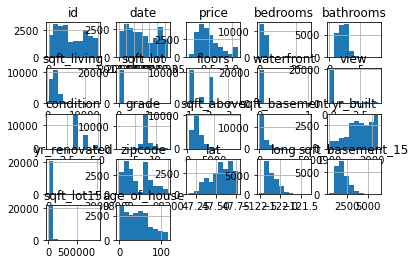

In [86]:
plt.figure(figsize=(30,30))
house_data.hist()
plt.show()

## Q1 How many employees having more than 5 years experience are earning more than 60000?

In [89]:
len(salary_data[(salary_data['YearsExperience']>5) & (salary_data['Salary']>60000)])

14

## Q2 How many employees are earning between 50000-80000

In [91]:
len(salary_data[(salary_data['Salary']>50000) & (salary_data['Salary']<80000)])

12

## Q3 The scatter plot in the following image shows the relationship between the “YearsExperience” and “Salary” columns. What possible inferences can be drawn from the plot?

a. The plot shows a positive correlation between the ‘YearsExperience” and “Salary”
column.
b. The plot shows no significant relationship between the “YearExperience” and
“Salary” column.
c. The plot shows a negative correlation between the “YearsExperience” and
“Salary” column.
d. None of the above.

In [92]:
px.scatter(salary_data['YearsExperience'],salary_data['Salary'])

## Q4. The distribution plot of the column “YearsExperience” is shown in the image below, what possible inferences can be drawn from the plot.

a. “YearsExperience” data is normally distributed.
b. “YearsExperience” data is positively skewed.
c. “YearsExperience” data is negatively skewed.
d. None of the above.

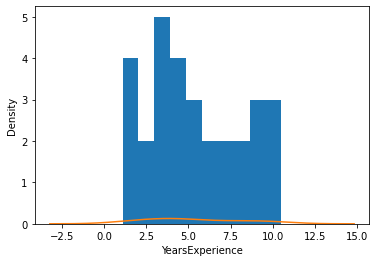

In [93]:
plt.hist(salary_data['YearsExperience'])
sns.kdeplot(salary_data['YearsExperience'])
plt.show()

## Q5What all inferences can be drawn from the table shown below:

a. The range of the “YearsExperience” and “Salary” data is (9.4 , 84660 )
b. The range of the “YearsExperience” and “Salary” data is (4.7 , 65237 )
c. The range of the “YearsExperience” and “Salary” data is (10.5, 122391)
d. The range of the “YearsExperience” and “Salary” data is (7.7 ,100544)

In [94]:
salary_data.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

# Q6. To split the dataset into training and testing data, if we use the following code. X = data['YearsExperience']
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0) What does it mean when we write the test size as 0.2?

a. The testing data will be 2% accurate.
b. The testing data will have 80% samples from the total population.
c. The testing data will have 2% samples from the total population.
d. The training data will consist of 80% of the samples from the total population.

In [97]:
from sklearn.model_selection import train_test_split
X = salary_data['YearsExperience']
y = salary_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Q7. In the above example code, we have taken the random state as 0, if we change the random state as 42, what does it mean for our training and testing data?
a. The shape of the training data will become (42,)
b. The shape of the training data will become (42,2)
c. The random state does not have any effect on the shape of the data.
d. The random state will increase the efficiency of the model by 42%.

## Q8. If the r2 score calculated in the above example is 0.98 , change the sample size of the training and testing set in the ratio 60:40, and build a linear regression model again. After plotting the best fit line on the test data, calculate the r2_score for the new model.
a. 0.98
b. 0.96
c. 1.0
d. 0.0

In [103]:
# Apply Linear Regression

In [ ]:
X.shape

In [ ]:
x=X.values.reshape(-1,1)
x.shape

In [111]:
# standardization

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_std = sc.fit_transform(x)
x_std

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [112]:
from sklearn.model_selection import train_test_split
# X = salary_data['YearsExperience']
# y = salary_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=0)

In [114]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [116]:
model.coef_

array([25983.84618192])

In [117]:
from sklearn.metrics import r2_score

In [118]:
y_train_pred = model.predict(X_train)

In [119]:
y_train_pred.shape

(24,)

In [120]:
r2_score(y_train,y_train_pred)

0.9411949620562126

In [121]:
from sklearn.model_selection import train_test_split
# X = salary_data['YearsExperience']
# y = salary_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.4, random_state=0)

In [122]:
from sklearn.linear_model import LinearRegression
model_2=LinearRegression()
model_2.fit(X_train,y_train)

LinearRegression()

In [123]:
y_train_pred = model_2.predict(X_train)

In [124]:
r2_score(y_train,y_train_pred)

0.9438034942328755

In [139]:
x=X_train.reshape(18,)
x.shape

(18,)

In [144]:
y_train.shape

(18,)

# BEST FIT LINE

In [141]:
a,b=np.polyfit(x,y_train,1)
a,b

(26248.304174814333, 76823.4168258502)

Text(-1, 120000, '26248.30x + 76823.42')

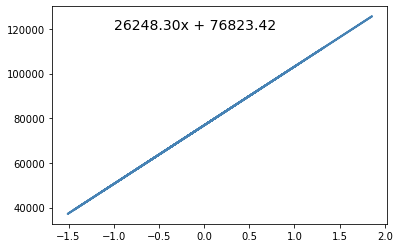

In [149]:
plt.plot(x, a*x+b, color='steelblue', linestyle='-', linewidth=2)
plt.text(-1,120000,size=14,s='{:.2f}'.format(a)+'x + '+'{:.2f}'.format(b))

## Q9. If while fitting the model with training and testing data, you get the following error ValueError: Expected 2D array, got 1D array instead: What could be the issue with the data, and how can you solve it?
a. Reshape the data to a two dimensional array
b. Reshape the data to two arrays of 1-D each.
c. Both A and B
d. None of the above

### The exercise after this contains questions that are based on the housing dataset.

## Q10. How many houses have a waterfront?
a. 21000
b. 21450
c. 163
d. 173

In [150]:
house_data.head()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3       1.00         1180      5650   
1  6414100192 2014-12-09  538000         3       2.25         2570      7242   
2  5631500400 2015-02-25  180000         2       1.00          770     10000   
3  2487200875 2014-12-09  604000         4       3.00         1960      5000   
4  1954400510 2015-02-18  510000         3       2.00         1680      8080   

   floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...        1180              0      1955   
1     2.0           0     0  ...        2170            400      1951   
2     1.0           0     0  ...         770              0      1933   
3     1.0           0     0  ...        1050            910      1965   
4     1.0           0     0  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_basement_15  sqft_lot15  \
0             0    98178  47.5112 -122.257              1340        5650   
1          1991    98125  47.7210 -122.319              1690        7639   
2             0    98028  47.7379 -122.233              2720        8062   
3             0    98136  47.5208 -122.393              1360        5000   
4             0    98074  47.6168 -122.045              1800        7503   

   age_of_house  
0            59  
1            63  
2            82  
3            49  
4            28  

[5 rows x 22 columns]

In [152]:
len(house_data[house_data['waterfront']>0])

163

## Q11. How many houses have 2 floors?
a. 2692
b. 8241
c. 10680
d. 161

In [153]:
len(house_data[house_data['floors']==2])

8241

## Q12. How many houses built before 1960 have a waterfront?
a. 80
b. 7309
c. 90
d. 92

In [155]:
len(house_data[(house_data['waterfront']>0) & (house_data['yr_built']<1960)])

80

## Q13. What is the price of the most expensive house having more than 4 bathrooms?
a. 7700000
b. 187000
c. 290000
d. 399000

In [157]:
house_data['price'].max()

1129575

In [162]:
house_data[house_data['bathrooms']==4]['price'].max()

1129575

In [164]:
house_data[(house_data['price']==1129575) & (house_data['bathrooms']==4)]

id       date    price  bedrooms  bathrooms  sqft_living  \
1133   7135520810 2014-07-30  1129575         4        4.0         4390   
1171   1117200390 2014-05-07  1129575         4        4.0         4460   
2267   3859900060 2015-01-12  1129575         5        4.0         6300   
3748   4389201250 2014-05-13  1129575         5        4.0         4430   
3777   3885803245 2015-03-05  1129575         5        4.0         3310   
3813   1118000301 2014-12-19  1129575         4        4.0         5780   
4486   1724069059 2014-05-24  1129575         5        4.0         4580   
4699   6648150090 2015-01-08  1129575         4        4.0         4050   
4859   1338300170 2015-03-24  1129575         5        4.0         4690   
5449   6065300840 2015-05-01  1129575         4        4.0         5040   
6041   1725059316 2014-11-20  1129575         4        4.0         6330   
6670   5608000630 2014-11-03  1129575         4        4.0         4500   
7200   3629890190 2014-06-06  1129575         4        4.0         4270   
7311   6072800170 2015-04-28  1129575         4        4.0         3330   
9333   3324079089 2014-11-21  1129575         4        4.0         5050   
9679   1370800700 2015-02-09  1129575         3        4.0         3910   
9914   6137500310 2015-02-13  1129575         5        4.0         4420   
10263   625059036 2014-08-13  1129575         5        4.0         4230   
10446  1118000320 2015-05-08  1129575         4        4.0         4260   
10817  4139480350 2015-01-13  1129575         4        4.0         5000   
11446   624069035 2014-12-09  1129575         4        4.0         4130   
11909  1924059319 2015-03-20  1129575         5        4.0         4050   
12204  1193000390 2014-06-20  1129575         5        4.0         3366   
12365  5451300117 2015-04-22  1129575         4        4.0         5280   
12459  4114601580 2014-07-24  1129575         6        4.0         3020   
12577  2806300065 2015-04-22  1129575         4        4.0         4430   
12682  5460500040 2015-04-21  1129575         5        4.0         4440   
14185  1333300145 2015-03-04  1129575         3        4.0         4200   
14232   824059305 2015-01-08  1129575         5        4.0         5840   
14681  4139910180 2015-01-14  1129575         5        4.0         4770   
14685    98000150 2015-01-02  1129575         4        4.0         4930   
14940  3627800050 2014-07-15  1129575         5        4.0         3760   
14995  4054550010 2015-04-13  1129575         5        4.0         4780   
15166  3304700130 2015-01-28  1129575         4        4.0         3860   
16524  3303850290 2015-04-09  1129575         5        4.0         4700   
16720  1338800425 2015-03-04  1129575         6        4.0         5110   
16844  8823900290 2015-03-17  1129575         9        4.0         4620   
17245  1235100328 2015-02-25  1129575         5        4.0         4070   
17341  4232902335 2014-08-14  1129575         5        4.0         2710   
17459  3625700010 2014-05-06  1129575         5        4.0         4510   
17647  3754501240 2015-02-06  1129575         3        4.0         5120   
18304  1425039029 2014-09-23  1129575         5        4.0         4390   
18477  1346300150 2014-10-20  1129575         8        4.0         7710   
18594  3023069166 2014-07-08  1129575         5        4.0         7320   
18875  4389201241 2014-12-30  1129575         4        4.0         4690   
19529  1651500040 2014-08-01  1129575         4        4.0         4360   
19764  7430200060 2015-04-24  1129575         4        4.0         5610   
19837  4233600260 2014-12-30  1129575         5        4.0         4180   
19858  2524069078 2015-01-22  1129575         4        4.0         7850   
20295   251500080 2014-08-26  1129575         4        4.0         4810   
20322  5556300098 2014-06-12  1129575         5        4.0         4410   
20441  1925059254 2015-05-07  1129575         5        4.0         6670   
20488  8691440220 2015-02-02  1129575   

## Q14. The image shown below shows the boxplot of the price column from the housing dataset. What inferences can you make from the plot?
a. The price column is normally distributed.
b. There might be high chances of price data having null values.
c. There is a presence of outliers in the price data.
d. There is no presence of outliers in the price data.

In [166]:
px.box(house_data['price'])

## Q15. For instance, if the ‘price’ column consists of outliers, how can you make the data clean and remove the redundancies?
a. Calculate the IQR range and drop the values outside the range.
b. Calculate the p-value and remove the values less than 0.05.
c. Calculate the correlation coefficient of the price column and remove the values less than
the correlation coefficient.
d. Calculate the Z-score of the price column and remove the values less than the z-score.

## Q16. What are the various parameters that can be used to determine the dependent variables in the housing data to determine the price of the house?
a. Correlation coefficients
b. Z-score
c. IQR Range
d. Range of the Features

## Q17. If we get the r2 score as 0.38, what inferences can we make about the model and its efficiency?
a. The model is 38% accurate, and shows poor efficiency.
b. The model is showing 0.38% discrepancies in the outcomes.
c. Low difference between observed and fitted values.
d. High difference between observed and fitted values.

## Q18. If the metrics show that the p-value for the grade column is 0.092, what all inferences can we make about the grade column?
a. Significant in presence of other variables.
b. Highly significant in presence of other variables
c. insignificance in presence of other variables
d. None of the above

## Q19. If the Variance Inflation Factor value for a feature is considerably higher than the other features, what can we say about that column/feature?
a. High multicollinearity
b. Low multicollinearity
c. Both A and B
d. None of the above

## Q1. How many houses have a waterfront?
A. 140
B. 340
C. 323
D. 163

## Q2. Which zip code has the costliest house?
A. 98456
B. 98102
C. 98283
D. 89034

In [233]:
house_data.head()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3       1.00         1180      5650   
1  6414100192 2014-12-09  538000         3       2.25         2570      7242   
2  5631500400 2015-02-25  180000         2       1.00          770     10000   
3  2487200875 2014-12-09  604000         4       3.00         1960      5000   
4  1954400510 2015-02-18  510000         3       2.00         1680      8080   

   floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...        1180              0      1955   
1     2.0           0     0  ...        2170            400      1951   
2     1.0           0     0  ...         770              0      1933   
3     1.0           0     0  ...        1050            910      1965   
4     1.0           0     0  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_basement_15  sqft_lot15  \
0             0    98178  47.5112 -122.257              1340        5650   
1          1991    98125  47.7210 -122.319              1690        7639   
2             0    98028  47.7379 -122.233              2720        8062   
3             0    98136  47.5208 -122.393              1360        5000   
4             0    98074  47.6168 -122.045              1800        7503   

   age_of_house  
0            59  
1            63  
2            82  
3            49  
4            28  

[5 rows x 22 columns]

In [243]:
(house_data[house_data.price == house_data.price.max()].zipcode == 98102).sum()

16

## Q3. How many houses are having grade 10?
A. 1133
B. 1134
C. 1135
D. 1132

In [245]:
house_data[house_data.grade == 10]

id       date    price  bedrooms  bathrooms  sqft_living  \
66     3394100030 2014-09-09   975000         4       2.50         2720   
75     3276920270 2014-11-05   832500         4       4.00         3430   
79     1531000030 2015-03-23   720000         4       2.50         3450   
91     5036300431 2015-03-11  1099880         5       2.75         3520   
108    1853000400 2015-03-05   680000         4       2.50         3140   
...           ...        ...      ...       ...        ...          ...   
21568   524059330 2015-01-30  1129575         4       3.50         3830   
21573  8562790760 2014-05-20   785000         4       3.50         3070   
21576  9253900271 2015-01-07  1129575         5       4.50         4850   
21593  8672200110 2015-03-17  1088000         5       3.75         4170   
21597   191100405 2015-04-21  1129575         4       3.25         3410   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
66        11049     2.0           0     0  ...        2720              0   
75        35102     2.0           0     0  ...        2390           1040   
79        39683     2.0           0     0  ...        3450              0   
91         6353     2.0           0     0  ...        3520              0   
108       28037     2.0           0     0  ...        3140              0   
...         ...     ...         ...   ...  ...         ...            ...   
21568      8963     2.0           0     0  ...        3120            710   
21573      4684     2.0           0     0  ...        2190            880   
21576     10584     2.0           1     4  ...        3540           1310   
21593      8142     2.0           0     2  ...        4170              0   
21597     10125     2.0           0     0  ...        3410              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_basement_15  \
66         1989             0    98004  47.5815 -122.192              2750   
75         1986             0    98075  47.5822 -121.987              3240   
79         2002             0    98010  47.3420 -122.025              3350   
91         2001             0    98199  47.6506 -122.391              2520   
108        1991             0    98077  47.7304 -122.082              2990   
...         ...           ...      ...      ...      ...               ...   
21568      2014             0    98004  47.5990 -122.197              2190   
21573      2009             0    98027  47.5316 -122.076              2290   
21576      2007             0    98008  47.5943 -122.110              3470   
21593      2006             0    98056  47.5354 -122.181              3030   
21597      2007             0    98040  47.5653 -122.223              2290   

       sqft_lot15  age_of_house  
66          11049            25  
75          35020            28  
79          39750            13  
91           6250            14  
108         35001            24  
...           ...           ...  
21568       10777             1  
21573        2664             5  
21576       18270             8  
21593        7980             9  
21597       10125             8  

[1134 rows x 22 columns]

## Q4. How many null values are there in the dataset?
A. 20
B. 19
C. 0
D. 4

## Q5. Does this 9126100861 customer have a waterfront?
A. Yes
B. No

In [247]:
house_data[house_data.id == 9126100861]

id       date   price  bedrooms  bathrooms  sqft_living  \
400  9126100861 2015-03-06  557000         3        3.5         1710   

     sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
400      2096     2.0           0     0  ...        1290            420   

     yr_built  yr_renovated  zipcode      lat     long  sqft_basement_15  \
400      2008             0    98122  47.6055 -122.305              1630   

     sqft_lot15  age_of_house  
400        1543             7  

[1 rows x 22 columns]

## Q6. How many houses have 3 views?
A. 340
B. 550
C. 510
D. 90

In [248]:
house_data[house_data.view == 3]

id       date    price  bedrooms  bathrooms  sqft_living  \
15     9297300055 2015-01-24   650000         4       3.00         2950   
60     1516000055 2014-12-10   650000         3       2.25         2150   
114    8961960160 2014-10-28   480000         4       2.50         3230   
153    7855801670 2015-04-01  1129575         4       3.25         5180   
216      46100204 2015-02-21  1129575         5       3.00         3300   
...           ...        ...      ...       ...        ...          ...   
21327  7394400080 2015-03-04   535000         4       3.25         2840   
21344  8835770170 2014-08-22  1129575         5       6.00         6880   
21505  9468200109 2014-06-17  1129575         3       3.50         4360   
21539  8902000201 2015-02-19   338500         3       2.25         1333   
21540   715010530 2015-01-13  1129575         5       3.50         4410   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
15         5000     2.0           0     3  ...        1980            970   
60        21235     1.0           0     3  ...        1590            560   
114       16171     2.0           0     3  ...        2520            710   
153       19850     2.0           0     3  ...        3540           1640   
216       33474     1.0           0     3  ...        1870           1430   
...         ...     ...         ...   ...  ...         ...            ...   
21327      4000     2.0           0     3  ...        2330            510   
21344    279968     2.0           0     3  ...        4070           2810   
21505      6240     2.0           0     3  ...        2960           1400   
21539      1470     3.0           0     3  ...        1333              0   
21540     13000     2.0           0     3  ...        2920           1490   

       yr_built  yr_renovated  zipcode      lat     long  sqft_basement_15  \
15         1979             0    98126  47.5714 -122.375              2140   
60         1959             0    98166  47.4336 -122.339              2570   
114        2001             0    98001  47.3183 -122.253              2640   
153        2006             0    98006  47.5620 -122.162              3160   
216        1957          1991    98040  47.5673 -122.210              3836   
...         ...           ...      ...      ...      ...               ...   
21327      2014             0    98108  47.5529 -122.293              2160   
21344      2007             0    98045  47.4624 -121.779              4690   
21505      2008             0    98103  47.6791 -122.354              1920   
21539      2009             0    98125  47.7058 -122.302              1360   
21540      2014             0    98006  47.5382 -122.111              5790   

       sqft_lot15  age_of_house  
15           4000            36  
60          18900            55  
114          8517            13  
153          9750             9  
216         20953            58  
...           ...           ...  
21327        4867             1  
21344      256803             7  
21505        3910             6  
21539        1680             6  
21540       12969             1  

[510 rows x 22 columns]

## Q7. What is the lowest price of the house?

In [249]:
house_data.price.min()

75000

## Q8. Which zip code area has the cheapest house?
A. 98000
B. 98022
C. 80000
D. 94500

In [250]:
house_data[house_data.price ==house_data.price.min()].zipcode

1149    98022
Name: zipcode, dtype: int64

## Q9. Which area has the biggest sqft_living?
A. 98053
B. 98055
C. 98035
D. None of the above

In [254]:
house_data[house_data['sqft_living'] == house_data['sqft_living'].max()].

id       date    price  bedrooms  bathrooms  sqft_living  \
12777  1225069038 2014-05-05  1129575         7        8.0        13540   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
12777    307752     3.0           0     4  ...        9410           4130   

       yr_built  yr_renovated  zipcode      lat     long  sqft_basement_15  \
12777      1999             0    98053  47.6675 -121.986              4850   

       sqft_lot15  age_of_house  
12777      217800            15  

[1 rows x 22 columns]

## Q10. In which year the costliest house has been built?
A. 2000
B. 1992
C. 1911
D. 1910

In [262]:
(house_data[house_data.price == house_data.price.max()].yr_built == 1910).sum()

8

## 11. Which of the following data types can a Pandas Series have?
A. Int
B. Str
C. Float
D. All of the above

## 12. Which of the following is having a one-dimensional array?
A. Series data type
B. DataFrame data type
C. Both of the above
D. None of the above

## 13. What value will you get on the left side after printing a series format data?
A. Data
B. Value
C. Index
D. All of the above

## 14. Which of the following is considered as data in pandas?
A. Dictionary
B. Boolean
C. Nd-array
D. All of the above

## 15. In what format the keys will get converted into when we convert the dictionary data into data frame format?
A. Rows
B. Columns
C. Indexes
D. Records

## 16. Write a function to perform the following operation:
Increase the grade of the house by 1 if the sqft of the house is greater than 0 and less than
equal to 400. If the total sqft of the house is greater than 400, increase the grade of the house
by 2.
After creating the above function, which syntax will be using when using apply function to run
the above created function in the dataset?
A. data.apply(your_function_name(arg1))
B. data.apply_fun(function_name())
C. data.app(data)
D. None of the above

## Q17. How to check the duplicate values on id,grade and location?
A. df.duplicated(subset=['id','zipcode','grade'])
B. df.duplicate(subset=['id','zipcode','grade'])
C. df[df.duplicated(['id','zipcode','grade’])]
D. All of the above

In [268]:
house_data[house_data.duplicated(['id','zipcode','grade'])]

id       date    price  bedrooms  bathrooms  sqft_living  \
94     6021501535 2014-12-23   700000         3       1.50         1580   
314    4139480200 2014-12-09  1129575         4       3.25         4290   
325    7520000520 2015-03-11   240500         2       1.00         1240   
346    3969300030 2014-12-29   239900         4       1.00         1000   
372    2231500030 2015-03-24   530000         4       2.25         2180   
...           ...        ...      ...       ...        ...          ...   
20181  7853400250 2015-02-19   645000         4       3.50         2910   
20613  2724049222 2014-12-01   220000         2       2.50         1000   
20670  8564860270 2015-03-30   502000         4       2.50         2680   
20780  6300000226 2015-05-04   380000         4       1.00         1200   
21581  7853420110 2015-05-04   625000         3       3.00         2780   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
94         5000     1.0           0     0  ...        1290            290   
314       12103     1.0           0     3  ...        2690           1600   
325       12092     1.0           0     0  ...         960            280   
346        7134     1.0           0     0  ...        1000              0   
372       10754     1.0           0     0  ...        1100           1080   
...         ...     ...         ...   ...  ...         ...            ...   
20181      5260     2.0           0     0  ...        2910              0   
20613      1092     2.0           0     0  ...         990             10   
20670      5539     2.0           0     0  ...        2680              0   
20780      2171     1.5           0     0  ...        1200              0   
21581      6000     2.0           0     0  ...        2780              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_basement_15  \
94         1939             0    98117  47.6870 -122.386              1570   
314        1997             0    98006  47.5503 -122.102              3860   
325        1922          1984    98146  47.4957 -122.352              1820   
346        1943             0    98178  47.4897 -122.240              1020   
372        1954             0    98133  47.7711 -122.341              1810   
...         ...           ...      ...      ...      ...               ...   
20181      2012             0    98065  47.5168 -121.883              2910   
20613      2004             0    98118  47.5419 -122.271              1330   
20670      2013             0    98045  47.4759 -121.734              2680   
20780      1933             0    98133  47.7076 -122.342              1130   
21581      2013             0    98065  47.5184 -121.886              2850   

       sqft_lot15  age_of_house  
94           4500            75  
314         11244            17  
325          7460            93  
346          7138            71  
372          6929            61  
...           ...           ...  
20181        5260             3  
20613        1466            10  
20670        5992             2  
20780        1598            82  
21581        6000             2  

[177 rows x 22 columns]

In [269]:
house_data.duplicated(['id','zipcode','grade']).sum()

177

## 18. Which of the following code will help to display the 3rd, 4th and 5th rows from the 6th to 9th columns of data frame data?
A. data.loc[3:6, 6:10]
B. data.iloc[3;6,6;10]
C. data.iloc[3:6,6:10]
D. None of the above

In [272]:
house_data.iloc[3:6,6:10]

sqft_lot  floors  waterfront  view
3      5000     1.0           0     0
4      8080     1.0           0     0
5    101930     1.0           0     0

## 19. Which of the following syntax will display the last two records of df?
import pandas as pd
df = pd.DataFrame({'A':[34, 78, 54], 'B':[12, 67, 43]}, index=['r1', 'r2', 'r3'])
A. df.iloc[:'r3']
B. df.loc['r2':'r3']
C. df.iloc['r2':'r3']
D. df.loc[:'r3']

In [273]:
df = pd.DataFrame({'A':[34, 78, 54], 'B':[12, 67, 43]}, index=['r1', 'r2', 'r3']) 
df

A   B
r1  34  12
r2  78  67
r3  54  43

In [279]:
df.loc['r2':'r3']

A   B
r2  78  67
r3  54  43

## 20. Which of the following is/are true about loc in pandas:
A. Add new rows in the data frames
B. To change the values of a row to a particular value
C. To extract values from the particular rows
D. All of the above

## 21. Change the date column in the format (dd/mm/year) using the pandas to_datetime() Function.
A. pd.to_datetime(data['date'], format='%Y-%m-%d', utc=False, dayfirst=True)
B. pd.to_datetime(data['date'])
C. pd.to_datetime(data['dates'], format='%Y-%m-%d', utc=False, dayfirst=True)
D. pd.to_datetime(data['date'])

In [283]:
pd.to_datetime(house_data['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

## 22. Create a separate data frame that satisfies the conditions below.
1. Houses built before 1980
2. Have more than 2 bedrooms
3. Have more than 2 floors.
A. data.loc[(data["yr_built"] > 1980) & (data['floors'] > 2) & (data['bedrooms'] > 2)]
B. data.loc[(data["yr_built"] < 1980) & (data['floors'] > 2) & (data['bedrooms'] > 2)]
C. data.loc[(data["yr_built"] | 1980) & (data['floors'] > 2) | (data['bedrooms'] > 2)]
D. data.loc[(data["yr_built"] < 1980) | (data['floors'] > 2) | (data['bedrooms'] < 2)]

## 23. For a given nested list, convert the same into a dataframe.
sample_list = [['Carl', 22],
['Martha', 25],
['Calvin', 12],
['Stuart', 15]
]
The resulting dataframe must contain the column names as ‘Name’, and ‘Age’ with the
respective values from the sample_list.
A. pd.DataFrame(sample_list)
B. pd.DataFrame(sample_list, column_names=['Name', 'Age'])
C. pd.DataFrame(sample_list, columns=['Name', 'Age'])
D. pd.DataFrame(sample_list, column_name=['Name', 'Age'])

In [286]:
sample_list = [['Carl', 22],['Martha', 25],['Calvin', 12],['Stuart', 15]]
pd.DataFrame(sample_list, columns=['Name', 'Age'])

Name  Age
0    Carl   22
1  Martha   25
2  Calvin   12
3  Stuart   15

## 24. For a given dictionary, convert the same into a dataframe.
sample_dict = {'Cristiano': ['Ronaldo','Man U', 801],
'Lionel': ['Messi','PSG', 758],
'Luis': ['Suarez','Atletico Madrid', 509],
'Robert': ['Lewandowski','Bayern Munich', 527],
'Zlatan': ['Ibrahimovic','AC Milan',553]
}
A. df1 = pd.Dataframe(sample_dict)
df1 = df1.transpose()
df1.reset_index(inplace = True)
df1.columns = ['First Name','Last Name', 'Club', 'Goals']
B. df1 = pd.DataFrame(sample_dict)
df1 = df1.transpose()
df1.reset_index(inplace = True)
df1.columns = ['First Name','Last Name', 'Club', 'Goals']
C. df1 = pd.DataFrame(sample_dict)
df1.reset_index(inplace = True)
df1.columns = ['First Name','Last Name', 'Club', 'Goals']
D. df1 = pd.DataFrame(sample_dict)
df1 = df1.transpose()
df1.columns = ['First Name','Last Name', 'Club', 'Goals']

In [300]:
sample_dict = {'Cristiano': ['Ronaldo','Man U', 801], 'Lionel': ['Messi','PSG', 758], 'Luis': ['Suarez','Atletico Madrid', 509], 'Robert': ['Lewandowski','Bayern Munich', 527], 'Zlatan': ['Ibrahimovic','AC Milan',553]}

# B
df1 = pd.DataFrame(sample_dict)
df1 = df1.transpose()
df1.reset_index(inplace = True)
df1.columns = ['First Name','Last Name', 'Club', 'Goals']
df1

First Name    Last Name             Club Goals
0  Cristiano      Ronaldo            Man U   801
1     Lionel        Messi              PSG   758
2       Luis       Suarez  Atletico Madrid   509
3     Robert  Lewandowski    Bayern Munich   527
4     Zlatan  Ibrahimovic         AC Milan   553

## 25. For a given tuple, convert the same into a dataframe.
sample_tuple = ([1, 'one', 3],
[2, 'two', 3],
[3, 'Three', 5],
[4, 'Four', 4],
[5, 'Five', 4])
A. pd.Dataframe(sample_tuple, columns=['Number', 'Number_text', 'txtlen'])
B. pd.DataFrame(sample_tuple, columns=['Number', 'Number_text', 'txtlen'])
C. pd.dataframe(sample_tuple, columns=['Number', 'Number_text', 'txtlen'])
D. pd.DataFrame(sample_tup, columns=['Number', 'Number_text', 'txtlen'])

In [303]:
sample_tuple = ([1, 'one', 3], [2, 'two', 3], [3, 'Three', 5],[4, 'Four', 4],[5, 'Five', 4])

pd.DataFrame(sample_tuple,columns=['Number', 'Number_text', 'txtlen'])

# B

Number Number_text  txtlen
0       1         one       3
1       2         two       3
2       3       Three       5
3       4        Four       4
4       5        Five       4

## 26. Create a separate dataframe that contains houses ordered in ascending or descending order of the prices of each house.
A. ascending = housing.sort_values('price', ascending=False)
descending = housing.sort_values('price', ascending=False)
B. ascending = housing.sort_values('price', ascending=True)
descending = housing.sort_values('price', ascending=False)
C. ascending = housing.sort_values('price', ascending=False)
descending = housing.sort_values('price', ascending=True)
D. ascending = housing.sort_values('price', ascending=True)
descending = housing.sort_values('price', ascending=True)

## 27. Calculate the mean and standard deviation of all the numerical values in the dataset. For
example - the mean for the bedrooms column is 3.370 and the standard deviation is 0.930.
A. housing.describe()
B. housing.info()
C. housing.corr()
D. housing.std()

## 28. Perform the following operations on the pandas dataframe.
1. Get the data starting from the rows 25 to 35.
2. Get the price of the houses located at the longitude--122.045 latitude- 47.6168.
A. data[25:35], data.loc[(housing["lat"] == 47.6168) | (data["long"] == -122.045)]
B. data[25:35], data.loc[(housing["lat"] == 48.6168) & (data["long"] == -122.045)]
C. data[25:36], data.loc[(housing["lat"] == 47.6168) & (data["long"] == -122.045)]
D. data[24:36], data.loc[(housing["lat"] == 47.6168) & (data["long"] == -122.045)]

In [342]:
# C.

house_data.loc[25:35]
# house_data.loc[(house_data["lat"] == 48.6168) & (house_data["long"] == -122.045)]

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
25  1202000200 2014-11-03  233000         3       2.00         1710      4697   
26  1794500383 2014-06-26  937000         3       1.75         2450      2691   
27  3303700376 2014-12-01  667000         3       1.00         1400      1581   
28  5101402488 2014-06-24  438000         3       1.75         1520      6380   
29  1873100390 2015-03-02  719000         4       2.50         2570      7173   
30  8562750320 2014-11-10  580500         3       2.50         2320      3980   
31  2426039314 2014-12-01  280000         2       1.50         1190      1265   
32   461000390 2014-06-24  687500         4       1.75         2330      5000   
33  7589200193 2014-11-10  535000         3       1.00         1090      3000   
34  7955080270 2014-12-03  322500         4       2.75         2060      6659   
35  9547205180 2014-06-13  696000         3       2.50         2300      3060   

    floors  waterfront  view  ...  sqft_basement  yr_built  yr_renovated  \
25     1.5           0     0  ...              0      1941             0   
26     2.0           0     0  ...            700      1915             0   
27     1.5           0     0  ...              0      1909             0   
28     1.0           0     0  ...            730      1948             0   
29     2.0           0     0  ...              0      2005             0   
30     2.0           0     0  ...              0      2003             0   
31     3.0           0     0  ...              0      2005             0   
32     1.5           0     0  ...            820      1929             0   
33     1.5           0     0  ...              0      1929             0   
34     1.0           0     0  ...            780      1981             0   
35     1.5           0     0  ...            790      1930          2002   

    zipcode      lat     long  sqft_basement_15  sqft_lot15  age_of_house  \
25    98002  47.3048 -122.218              1030        4705            73   
26    98119  47.6386 -122.360              1760        3573            99   
27    98112  47.6221 -122.314              1860        3861           105   
28    98115  47.6950 -122.304              1520        6235            66   
29    98052  47.7073 -122.110              2630        6026            10   
30    98027  47.5391 -122.070              2580        3980            11   
31    98133  47.7274 -122.357              1390        1756             9   
32    98117  47.6823 -122.368              1460        5000            85   
33    98117  47.6889 -122.375              1570        5080            85   
34    98058  47.4276 -122.157              2020        8720            33   
35    98115  47.6827 -122.310              1590        3264            84   

    Floor Area  
25        8117  
26        7591  
27        4381  
28        9420  
29       12313  
30        8620  
31        3645  
32        9660  
33        5180  
34       10779  
35        7660  

[11 rows x 23 columns]

## 29. Create a new column with the floor area(sqft_living, sqft_lot, sqft_above, sqft_basement, all combined in one column).
A. data['Floor Area'] = data['sqft_living'], data['sqft_lot'], data['sqft_basement'],
data['sqft_above']
B. df['Floor Area'] = data['sqft_living'] + data['sqft_lot'] + data['sqft_basement'] +
data['sqft_above']
C. data['Floor Area'] = data['sqft_living', 'sqft_lot','sqft_basement','sqft_above']
D. data['Floor Area'] = data['sqft_liv', 'sqft_lot','sqft_base','sqft_above']

In [337]:
# B

house_data['Floor Area'] = house_data['sqft_living'] + house_data['sqft_lot'] + house_data['sqft_basement'] + house_data['sqft_above']
house_data.head()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3       1.00         1180      5650   
1  6414100192 2014-12-09  538000         3       2.25         2570      7242   
2  5631500400 2015-02-25  180000         2       1.00          770     10000   
3  2487200875 2014-12-09  604000         4       3.00         1960      5000   
4  1954400510 2015-02-18  510000         3       2.00         1680      8080   

   floors  waterfront  view  ...  sqft_basement  yr_built  yr_renovated  \
0     1.0           0     0  ...              0      1955             0   
1     2.0           0     0  ...            400      1951          1991   
2     1.0           0     0  ...              0      1933             0   
3     1.0           0     0  ...            910      1965             0   
4     1.0           0     0  ...              0      1987             0   

   zipcode      lat     long  sqft_basement_15  sqft_lot15  age_of_house  \
0    98178  47.5112 -122.257              1340        5650            59   
1    98125  47.7210 -122.319              1690        7639            63   
2    98028  47.7379 -122.233              2720        8062            82   
3    98136  47.5208 -122.393              1360        5000            49   
4    98074  47.6168 -122.045              1800        7503            28   

   Floor Area  
0        8010  
1       12382  
2       11540  
3        8920  
4       11440  

[5 rows x 23 columns]

## 30. Perform the following operations on the dataframes given below.
A = pd.DataFrame([['Carl', 22],['Martha', 25],['Calvin', 12],['Stuart', 15]], columns=[‘Name’, ‘Age’])
B = pd.DataFrame([['Melvin', 25],['Martha', 34],['Lewis', 32],['Leo', 25]], columns=[‘Name’, ‘Age’])
1. Left Outer Join
2. Outer Join
3. Inner Join
4. Right Outer Join
A. inner = pd.merge(A, B, on='Age', how='inner_join')
outer = pd.merge(A, B, on='Age', how='outer_join')
left_outer = pd.merge(A, B, on='Age', how='left_join')
right_outer = pd.merge(A, B, on='Age', how='right_join')
B. inner = pd.merge(A, B, on='Age', how='inner')
outer = pd.merge(A, B, on='Age', how='outer')
left_outer = pd.merge(A, B, on='Age', how='left_outer')
right_outer = pd.merge(A, B, on='Age', how='right_outer')
C. inner = pd.merge(A, B, on='Age', how='inner')
outer = pd.merge(A, B, on='Age', how='outer')
left_outer = pd.merge(A, B, on='Age', how='left')
right_outer = pd.merge(A, B, on='Age', how='right')
D. inner = pd.merge(A, B, on='Age', how='inner')
outer = pd.merge(A, B, on='Age', how='outer')
left_outer = pd.merge(A, B, on='Age', how='outer_left')
right_outer = pd.merge(A, B, on='Age', how='outer_right')

In [323]:
A = pd.DataFrame([['Carl', 22],['Martha', 25],['Calvin', 12],['Stuart', 15]], columns=['Name', 'Age'])
B = pd.DataFrame([['Melvin', 25],['Martha', 34],['Lewis', 32],['Leo', 25]], columns=['Name', 'Age'])
A

Name  Age
0    Carl   22
1  Martha   25
2  Calvin   12
3  Stuart   15

In [324]:
B

Name  Age
0  Melvin   25
1  Martha   34
2   Lewis   32
3     Leo   25

In [335]:
a=pd.merge(A,B,on='Age',how='left')
b=pd.merge(A,B,on='Age',how='outer')
c=pd.merge(A,B,on='Age',how='inner')
d=pd.merge(A,B,on='Age',how='right')
# left', 'right', 'outer', 'inner', 'cross'

print(a,end='\n\n')
print(b,end='\n\n')
print(c,end='\n\n')
print(d)

   Name_x  Age  Name_y
0    Carl   22     NaN
1  Martha   25  Melvin
2  Martha   25     Leo
3  Calvin   12     NaN
4  Stuart   15     NaN

   Name_x  Age  Name_y
0    Carl   22     NaN
1  Martha   25  Melvin
2  Martha   25     Leo
3  Calvin   12     NaN
4  Stuart   15     NaN
5     NaN   34  Martha
6     NaN   32   Lewis

   Name_x  Age  Name_y
0  Martha   25  Melvin
1  Martha   25     Leo

   Name_x  Age  Name_y
0  Martha   25  Melvin
1     NaN   34  Martha
2     NaN   32   Lewis
3  Martha   25     Leo


## 31. What will be the correlation between the columns sqft_living and sqft_above?
A. 0.702035
B. 0.754665
C. 0.876597
D. 0.303093

In [341]:
# C
house_data['sqft_living'].corr(house_data.sqft_above)

0.8765965986813181

## 32. If the correlation between the columns bathrooms and sqft_living is 0.754665, what all interpretations can be made about the two columns?
A. A positive correlation between the two columns
B. The columns show perfect correlation.
C. A strong negative correlation between the two columns
D. No correlation between the two columns.